In [1]:
# Script to format the filename correctly
fn1 = "Priam"
ln1 = "Cardouat"
filename = "_".join(map(lambda s: s.strip().lower(),
                    ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"


# TP2 : Linear regression

Imports necessary packages:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sn
from sklearn.model_selection import train_test_split
from scipy.stats import t


# Exercice 1

## Q1. Preprocess the data

Import data from the file "data_tp_2.csv"

In [3]:
path = './data_tp_2.csv'
data = pd.read_csv(path, sep=',')
data.head()


,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,...,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,...,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,...,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,...,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,...,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2


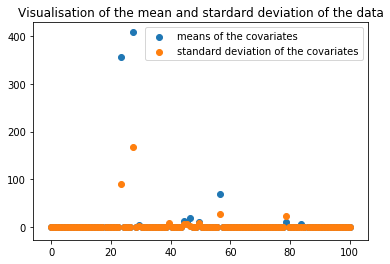

In [4]:
# Compute the median and the standard deviation for the covariates
mean = data.aggregate(np.mean)[None, 0:100]
std = data.aggregate(np.std)[None, 0:100]

# Plot range
xr = np.linspace(0, 100, 100)

# Plot
plt.figure()
plt.scatter(xr, mean, label='means of the covariates')
plt.scatter(xr, std, label='standard deviation of the covariates')
plt.title('Visualisation of the mean and stardard deviation of the data')
plt.legend()
plt.show()


We can see that the data is neither centered nor normalized nor standardized. 

We then separate the dataset in two matrices X and Y.

In [5]:
X = data.iloc[:, 0:100]
Y = data['Y']


We separate the covariates data into test and train sets :

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, test_size=0.25, random_state=69)


Then we center and standarize the train and test data and plot its mean and variance again

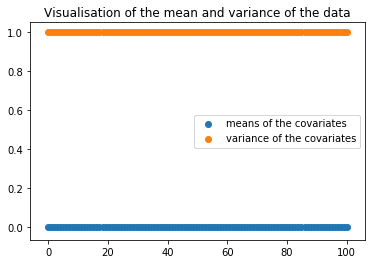

In [7]:
Xtrain_c = preprocessing.StandardScaler().fit_transform(Xtrain)
Xtest_c = preprocessing.StandardScaler().fit_transform(Xtest)
Ytrain_c = (Ytrain-np.mean(Y))
Ytest_c = (Ytest-np.mean(Y))
mean_c = Xtrain_c.mean(axis=0)
std_c = Xtrain_c.std(axis=0)

# Plot range
xc = np.linspace(0, 100, 100)

# Plot
plt.figure()
plt.scatter(xc, mean_c, label='means of the covariates')
plt.scatter(xc, std_c**2, label='variance of the covariates')
plt.title('Visualisation of the mean and variance of the data')
plt.legend()
plt.show()


It is important to have variables that are scaled : for example the LASSO is defined for centered variables (easier and we do not have to compute the intercept), besides we have seen that it gives the same OLS and predictor (without the intercept though). Moreover with LASSO (but also with Ridge) there is no invariance properties, that is why we should work with scaled variables.

In [8]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()


## Q2. Compute the determination coefficients and the mean squared error

In [9]:
def determination_coefficient(Y_true, Y_pred):
    # We will use the second formula
    Y_bar = np.mean(Y_true)
    SSE = np.sum((Y_true-Y_pred)**2)
    SST = np.sum((Y_true - Y_bar)**2)
    return 1-(SSE/SST)


def MSE(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred)**2)


## Q3. Linear regression model

### a)

Let us apply the linear regression of the sklearn library to the low dimensional data :

In [10]:
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(Xtrain_c, Ytrain_c)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### b)

In [11]:
Y_pred = lin_reg.predict(Xtest_c)
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(
    determination_coefficient(Ytest_c, Y_pred)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(Ytest_c, Y_pred)))



Determination coefficient R^2 = 0.6003.


Mean Squared Error MSE = 28.7915.



### c)

We add a column named OLS to the df_test dataframe that contains the predicted values for the
sample 

In [12]:
df_test['OLS'] = Y_pred


### d)

We add a column named OLS to the df_coef dataframe that contains the estimated coefficients.

In [13]:
df_coef['OLS'] = lin_reg.coef_


## Q4. Covariance matrix

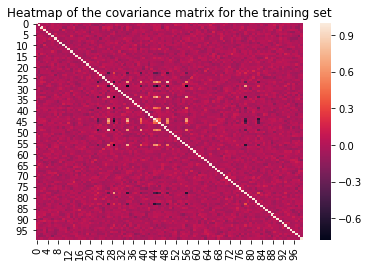

In [14]:
covMatrix = pd.DataFrame.cov(pd.DataFrame(Xtrain_c))
sn.heatmap(covMatrix, annot=False, fmt='g')
plt.title('Heatmap of the covariance matrix for the training set')
plt.show()


We can observe that most of the covariates are not correlated, except for a few (those with a color stain outside the diagonale).

We then compute the singular value decomposition of the covariance matrix :

In [15]:
U, s, V = np.linalg.svd(covMatrix)


## Q5. PCA

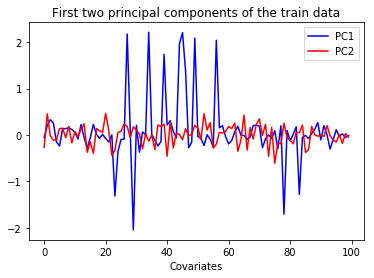

In [16]:
# PC computing
PC = U @ np.diag(s)

# Plot
plt.figure()
plt.plot(PC[:, 0], c='blue', label='PC1')
plt.plot(PC[:, 1], c='red', label='PC2')
plt.title('First two principal components of the train data')
plt.xlabel('Covariates')
plt.legend()
plt.show()


We can see that the values obtained for the first principal components are greater than those of the second since PC1 has the greatest variances. 

## Q.6 PCA before OLS



In [17]:
# Computation of projected data for both the train and the test data
Xtrain_proj = Xtrain_c @ U[:, :2]
Xtest_proj = Xtest_c @ U[:, :2]

# Linear regression
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain_proj, Ytrain_c)

# Determination coefficient and mean squared error
Y_pred = reg.predict(Xtest_proj)
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(
    determination_coefficient(Ytest_c, Y_pred)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(Ytest_c, Y_pred)))



Determination coefficient R^2 = 0.4085.


Mean Squared Error MSE = 42.6081.



We add a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample

In [18]:
df_test['pca_ols'] = Y_pred


## Q.7 Absolute values of the loadings

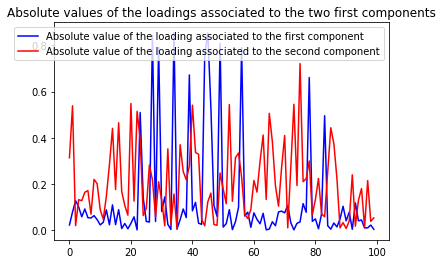

In [19]:
# Computation of the absolute values of the loadings on the two first PC
phi_1 = np.abs(np.sqrt(s[0])*U[:, 0])
phi_2 = np.abs(np.sqrt(s[0])*U[:, 1])

# Plot
plt.figure()
plt.plot(
    phi_1, c='blue',
    label='Absolute value of the loading associated to the first component')
plt.plot(
    phi_2, c='red',
    label='Absolute value of the loading associated to the second component')
plt.title(
    "Absolute values of the loadings associated to the two first components")
plt.legend()
plt.show()


## Q8. LASSO model


In [20]:
# Different values of the regularization parameter spaced evenly on a log scale
param = np.logspace(-3, 1, num=30)

# Lasso model
reg = linear_model.LassoCV(alphas=param, fit_intercept=False)
reg.fit(Xtrain_c, Ytrain_c)

# Determination coefficient and the MSE of the test data
Y_pred = reg.predict(Xtest_c)
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(
    determination_coefficient(Ytest_c, Y_pred)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(Ytest_c, Y_pred)))

# Regularization parameter that the algorithm selects
print(
    '\nRegularization parameter selected by the algorithm = {:.4f}.\n'.format(
        reg.alpha_))



Determination coefficient R^2 = 0.6672.


Mean Squared Error MSE = 23.9746.


Regularization parameter selected by the algorithm = 0.3039.



Then we add a column named lasso to the df_test dataframe that contains the predicted values for
the sample and a column named lasso to the df_coef dataframe that contains the estimated coefficients :

In [21]:
df_test['lasso'] = Y_pred
df_coef['lasso'] = reg.coef_


## Q.9 Ridge model

In [22]:
# Different values of the regularization parameter spaced evenly on a log scale
param = np.logspace(-1, 2, num=30)

# Lasso model
reg = linear_model.RidgeCV(alphas=param, fit_intercept=False)
reg.fit(Xtrain_c, Ytrain_c)

# Regularization parameter that the algorithm selects
print(
    '\nRegularization parameter selected by the algorithm = {:.4f}.\n'.format(
        reg.alpha_))

# Determination coefficient and the MSE of the test data
Y_pred = reg.predict(Xtest_c)
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(
    determination_coefficient(Ytest_c, Y_pred)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(Ytest_c, Y_pred)))



Regularization parameter selected by the algorithm = 48.9390.


Determination coefficient R^2 = 0.6390.


Mean Squared Error MSE = 26.0029.



Then we add a column named Ridge to the df_test dataframe that contains the predicted values for the sample and a column named Ridge to the df_coef dataframe that contains the estimated coefficients.

In [23]:
df_test['Ridge'] = Y_pred
df_coef['Ridge'] = reg.coef_


## Q.10 Forward variable selection

We will use the test statistics of the test for nullity (as seen during the course). For the moment, we will not define the stop criterion for the method, i.e. we will add a variables at each time until all the variables are used. We will compute the algorithm given in the course.

In [24]:
def forward_variable_selection(Y, X):
    # Initialisation
    Xcopy = X.copy()
    n = len(Y)
    r = Y
    S = []
    p = len(X[0])
    A = [k for k in range(p)]
    stats = []
    temp = []
    t_stats = []
    while len(A) != 0:
        for k in A:
            # Compute the OLS
            lin_reg = linear_model.LinearRegression(fit_intercept=False)
            lin_reg.fit(Xcopy[:, k].reshape(-1, 1), r)
            coef = lin_reg.coef_
            G_n = (1/n)*np.sum(Xcopy[:, k]**2)
            sigma_n = (1/(n-2))*np.sum(
                (r-coef*Xcopy[:, k])**2)
            s_n = G_n**(-1)
            T = np.sqrt(n)*abs(coef)/np.sqrt(sigma_n*s_n)
            stats.append([T, k])
            temp.append(T)
        i = np.argmax(temp)
        k_star = stats[i][1]  # The index of the covariates we choose to select
        S.append(k_star)
        r -= lin_reg.predict(Xcopy[:, k_star].reshape(-1, 1))
        A.remove(k_star)
        t_stats.append(temp)
        stats = []
        temp = []
    # We provide the order of the variable selection as well as the t-stats at
    # the different steps
    return S, t_stats


# Order of the variable selection
covariate_index, t_stats = forward_variable_selection(Ytrain_c, Xtrain_c)
print("Order of the variable selection :", covariate_index)


Order of the variable selection : [44, 83, 46, 45, 27, 39, 34, 78, 56, 23, 49, 75, 94, 12, 1, 71, 29, 24, 31, 9, 18, 42, 89, 67, 62, 32, 86, 37, 91, 68, 50, 80, 58, 69, 14, 55, 73, 85, 79, 15, 2, 16, 87, 70, 88, 26, 6, 3, 47, 57, 40, 81, 30, 22, 20, 97, 59, 93, 4, 8, 43, 96, 54, 99, 90, 61, 92, 74, 11, 53, 65, 19, 21, 52, 17, 76, 35, 7, 95, 51, 25, 5, 72, 0, 77, 28, 98, 64, 33, 60, 48, 36, 10, 38, 13, 63, 66, 41, 82, 84]


## Q11. Forward variable selection with a stop criterion

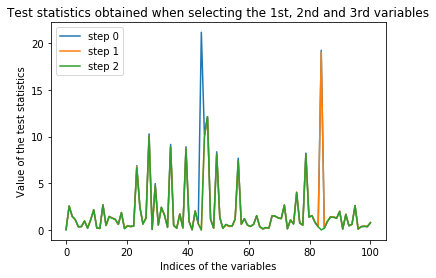

In [25]:
def forward_variable_selection_with_stop(Y, X, p_stop):
    t_stat_result = [t_stats[0]]
    p_values_list = [[], []]
    selected_variables = []
    for k in range(1, len(covariate_index)):
        T = max(t_stats[k-1])
        p_val = p_value(T, len(X[0]), len(X))
        p_values_list[0].append(p_val)
        p_values_list[1].append(covariate_index[k-1])
        if p_val < p_stop:
            t_stat_result.append(t_stats[k])
            selected_variables.append(covariate_index[k-1])
        for i in range(1, k+1):
            t_stats[k].insert(covariate_index[i-1], 0)
    return t_stat_result, p_values_list, selected_variables


# Function to compute the p_value assuming a gaussian model,
# and using the survival function
def p_value(T, p, n):
    p_value = 2*t.sf(T, n-p-1)
    return p_value


# Illustration of the method
t_stats, p_val, selected_var = forward_variable_selection_with_stop(
    Ytrain_c, Xtrain_c, 0.05)
plt.figure()
plt.plot(xr, t_stats[0], label='step 0')
plt.plot(xr, t_stats[1], label='step 1')
plt.plot(xr, t_stats[2], label='step 2')
plt.xlabel('Indices of the variables')
plt.ylabel('Value of the test statistics')
plt.title(
    'Test statistics obtained when selecting the 1st, 2nd and 3rd variables')
plt.legend()
plt.show()


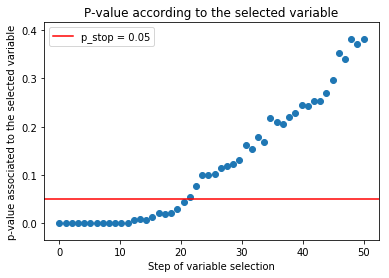

In [26]:
plt.figure()
plt.scatter(np.linspace(0, 50, 50), p_val[0][:50])
plt.xlabel('Step of variable selection')
plt.ylabel('p-value associated to the selected variable')
plt.title('P-value according to the selected variable')
plt.axhline(y=0.05, color='red', label='p_stop = 0.05')
plt.legend()
plt.show()


In [27]:
print('List of selected variables = ', selected_var)


List of selected variables =  [44, 83, 46, 45, 27, 39, 34, 78, 56, 23, 49, 75, 94, 12, 1, 71, 29, 24, 31, 9, 18]


## Q.12 OLS on the selected variables

We will run OLS on the selected variables

In [28]:
# We take the selected variables
Xtrain_selected = Xtrain_c[:, selected_var[0]]
Xtest_selected = Xtest_c[:, selected_var[0]]
for i in range(1, len(selected_var)):
    Xtrain_selected = np.column_stack(
        (Xtrain_selected, Xtrain_c[:, selected_var[i]]))
    Xtest_selected = np.column_stack(
        (Xtest_selected, Xtest_c[:, selected_var[i]]))

# OLS
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(Xtrain_selected, Ytrain_c)

# Determination coefficient and MSE of the test data
Y_pred = lin_reg.predict(Xtest_selected)
print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(
    determination_coefficient(Ytest_c, Y_pred)))
print('\nMean Squared Error MSE = {:.4f}.\n'.format(MSE(Ytest_c, Y_pred)))



Determination coefficient R^2 = 0.5849.


Mean Squared Error MSE = 29.9047.



We then add a column named FVS to the df_test dataframe that contains the predicted values for the sample and a column named FVS to the df_coef dataframe that contains the estimated coefficients.

In [29]:
df_test['FVS'] = Y_pred

# For the coefficients, we only have data for the selected variables,
# the others coefficients will be set to 0.
coef = [0]*100
for i in range(len(selected_var)):
    coef[selected_var[i]] = lin_reg.coef_[i]

# We finally add a column assiociated to the coefficients obtained
# with this method
df_coef['FVS'] = coef


## Q.13 Summary of the results of all the methods

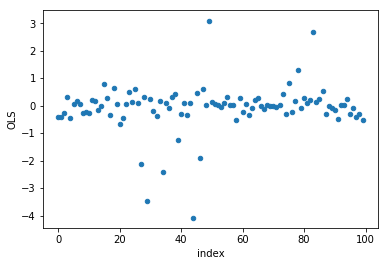

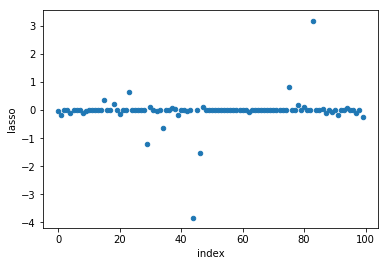

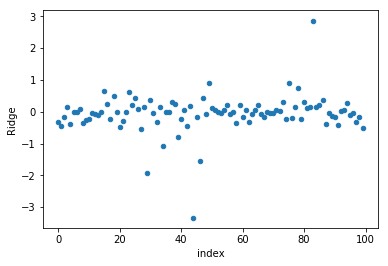

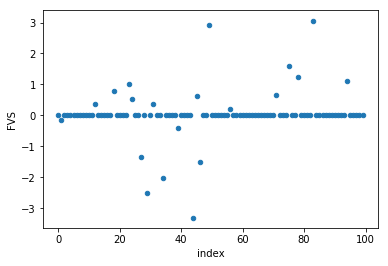

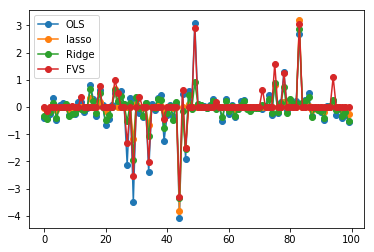

In [30]:
for k in range(len(df_coef.columns)):
    df_coef.reset_index().plot(kind='scatter', x='index', y=df_coef.columns[k])
df_coef.plot(marker='o')


First of all, we can see that the coefficients obtained with Ridge and OLS are quite similar, it is also the case for the LASSO and FVS : they have similar "most important coefficients" even though Ridge keeps more coefficients. Finally, all the methods seems to have similar "most important coefficients" as it can be seen on the last graph. We can also see that lasso and FVS give simpler models than OLS and Ridge.

Besides, the lasso method is the method with the highest determination coefficient and the lowest mean squared error (while PCA before OLS appears to be the worst one).

## Q.14 Coefficients set to zero

In [31]:
print(
    '\nNumber of coefficients set exactly to zero by OLS= {:.4f}.\n'.format(
        len(df_coef['OLS'].loc[df_coef['OLS'] == 0])))
print(
    '\nNumber of coefficients set exactly to zero by lasso= {:.4f}.\n'.format(
        len(df_coef['lasso'].loc[df_coef['lasso'] == 0])))
print(
    '\nNumber of coefficients set exactly to zero by Ridge= {:.4f}.\n'.format(
        len(df_coef['Ridge'].loc[df_coef['Ridge'] == 0])))
print('\nNumber of coefficients set exactly to zero by FVS= {:.4f}.\n'.format(
    len(df_coef['FVS'].loc[df_coef['FVS'] == 0])))



Number of coefficients set exactly to zero by OLS= 0.0000.


Number of coefficients set exactly to zero by lasso= 65.0000.


Number of coefficients set exactly to zero by Ridge= 0.0000.


Number of coefficients set exactly to zero by FVS= 79.0000.



Like in Ridge regression, lasso also shrinks the estimated coefficients to zero but the penalty effect will forcefully make the coefficients equal to zero if the tuning parameter is large enough. Hence, much like best subset selection, the lasso performs feature selection. Hence there are a lot more coefficient set to zero with lasso.

## Q.15 New prediction

Text(0.5,1.08,'Pairplot of the df_test dataframe')

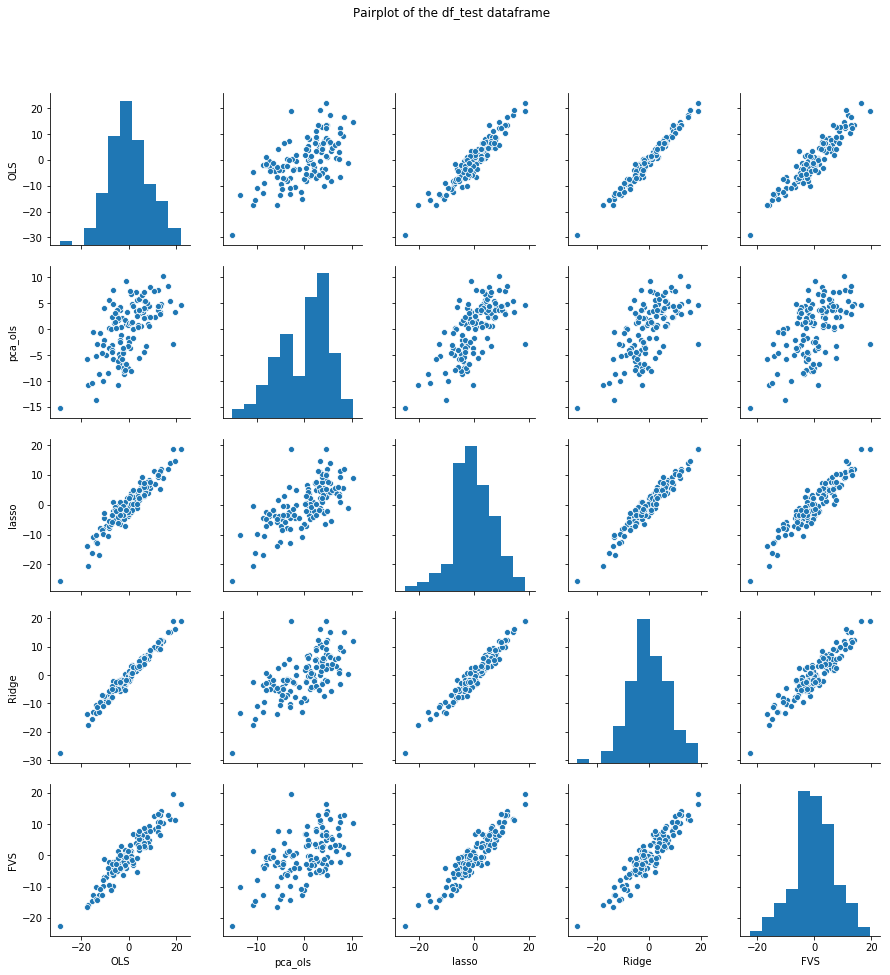

In [32]:
graph = sn.pairplot(df_test)
graph.fig.suptitle('Pairplot of the df_test dataframe', y=1.08)


Firslty, we can see on the diagonal that predicted values are gaussian, thus giving an additionnal justification to the choice of a gaussian model at question 11.

Let the fitted coefficient of the previous problems be $\hat{\theta}^{rd}$ for the ridge, $\hat{\theta}^{ols}$ for the OLS, $\hat{\theta}^{pca}$ for the PCA before OLS, and $\hat{\theta}^{ls}$ for the lasso. If we are given a new unseed data point x, the predicted value will be obtained thanks to the following equation :

$$
\left\{
    \begin{array}{ll}
        \hat{\theta}^{rd}x & \mbox{for the ridge } \\
        \hat{\theta}^{ols}x & \mbox{for the OLS } \\
        \hat{\theta}^{pca}x & \mbox{for the PCA before OLS } \\
        \hat{\theta}^{ls}x & \mbox{for the lasso} \\
    \end{array}
\right.
$$

Given the fact that the lasso gives the highest determination coefficient with the lowest mean squared error, the predicted value for the new unseen data would be given by :

$$\hat{\theta}^{ls}x$$